In [1]:
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

# Tuples and Dictionaries Exercise

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

The purpose of the exersise is to manipulate and plot the current weather of a number of European cities. The data has been downloaded from [Openweather](http://openweathermap.org/), and has been loaded for you below using the given function `read_weather`.

The function returns a list of dictionaries, each of which contains the name of the cities along with a large number of the weather parameters. Before you start the exercise, print various parts of `Data` familiarise yourself with the content.


In [3]:
def read_weather():
    with open('data/weather.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
# The file weather.pkl contains a list of dictionaries 
Data = read_weather()
Data[0]

{'clouds': {'all': 0},
 'coord': {'lat': 55.75, 'lon': 37.62},
 'dt': 1465311687,
 'id': 524901,
 'main': {'humidity': 53,
  'pressure': 1013,
  'temp': 281.44,
  'temp_max': 283.15,
  'temp_min': 279.82},
 'name': 'Moscow',
 'rain': {'1h': 1.02},
 'sys': {'country': 'RU',
  'id': 7323,
  'message': 0.0307,
  'sunrise': 1465260428,
  'sunset': 1465322999,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
   'icon': '09d',
   'id': 520,
   'main': 'Rain'}],
 'wind': {'deg': 340, 'speed': 7}}

### Part 1: Temperature

1. We want to manipulate the data so it is easier to plot. Create a new dictionary with the country names as keys (`name` entries in `Data`) and the values being the tuple of `(lattitude, temperature)` corresponding to that country.
    * *You will need a for loop*

2. Plot the temperature of the cities (y) vs lattitude (x)
    * You could either do this by scattering the data or using a for loop. The easier approach would be to use a for loop and the 'x' marker.
    * Also try to add the city names to the scattered markers using `ax.annotate`

In [5]:
# Implement Q1 part 1 here:
# -------------------------
tempr_dict = {}

for countrydata in Data: 
    tempr_dict[countrydata['name']] = (countrydata['coord']['lat'], countrydata['main']['temp'])

print(tempr_dict)

{'Southampton': (50.9, 295.59), 'Berlin': (52.52, 302.65), 'London': (51.51, 295.02), 'Kiev': (50.43, 287.81), 'Moscow': (55.75, 281.44)}


In [6]:
# Run this cell to tests if you have completed part 1 correctly:
assert(all(key in tempr_dict for key in ['Berlin', 'Kiev', 'London', 'Moscow', 'Southampton'])),\
    'keys of your weather dictionary should be Berlin, Kiev, London, Moscow, Southampton'

assert(len(tempr_dict['Moscow']) == 2), "Entries in your dictionary should be a tuple of two values"

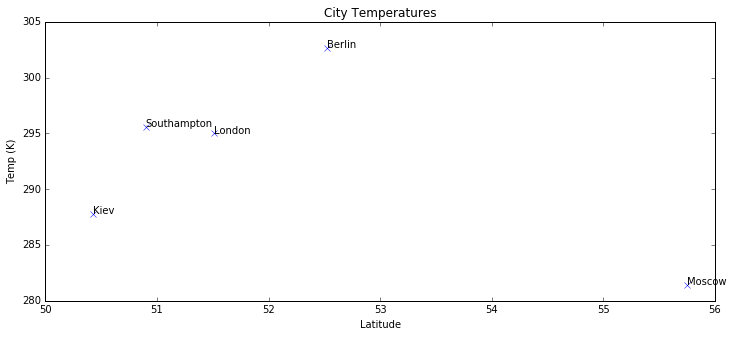

In [7]:
# Part 2:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

for name, value in tempr_dict.items():
    ax.plot(value[0], value[1], 'bx')
    ax.annotate(name, value)

ax.set_title('City Temperatures')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temp (K)')



### Optional extension: Weather
Temperature is not the only parameter in the data. By extending the code you wrote above, plot the remaining variables 

1. Instead of storing the value in your dictionary as `(lattitude, temp)`, use the tuple (`lattitude, main`) where `main` is the dictionary containing `temp`, `pressure` and `humidity` etc. entries from the original `Data` list

2. Write a function which takes the weather dictionary and a string variable name (e.g. `'temp'`, `'pressure'`...) as arguments and plots the chosen variable against lattitude for all countries in the weather dictionary
    * Start from your plotting code in the previous question

In [8]:
# Implement Q2 pt 1 here
# -----------------------
weather_dict = {}

for countrydata in Data:
    weather_dict[countrydata['name']] = countrydata['coord']['lat'], countrydata['main']

print(weather_dict)

{'Southampton': (50.9, {'pressure': 1023, 'temp': 295.59, 'temp_max': 297.04, 'temp_min': 293.71, 'humidity': 64}), 'Berlin': (52.52, {'pressure': 1021, 'temp': 302.65, 'temp_max': 309.82, 'temp_min': 298.15, 'humidity': 22}), 'London': (51.51, {'pressure': 1023, 'temp': 295.02, 'temp_max': 298.15, 'temp_min': 291.48, 'humidity': 73}), 'Kiev': (50.43, {'pressure': 1020, 'temp': 287.81, 'temp_max': 288.15, 'temp_min': 287.15, 'humidity': 38}), 'Moscow': (55.75, {'pressure': 1013, 'temp': 281.44, 'temp_max': 283.15, 'temp_min': 279.82, 'humidity': 53})}


In [9]:
def plot_weather_lattitude(weather_dictionary, var_name):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)

    for name, value in weather_dictionary.items():
        ax.plot(value[0], value[1][var_name], 'bx')
        ax.annotate(name, (value[0], value[1][var_name]))

    ax.set_xlabel('Latitude')
    ax.set_ylabel(var_name)


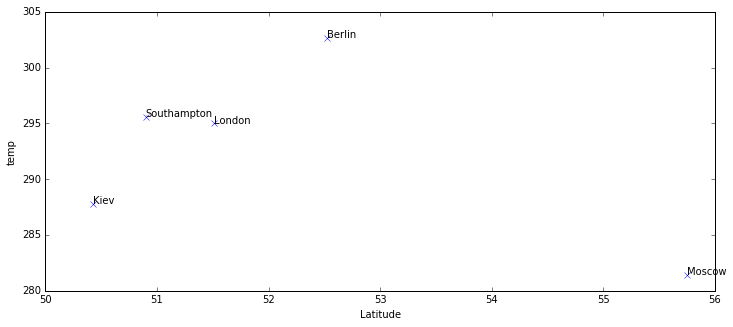

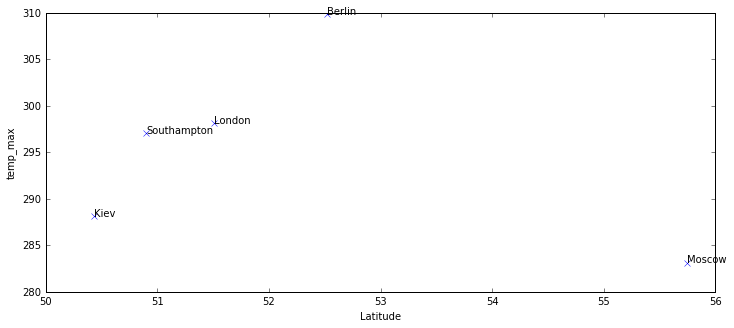

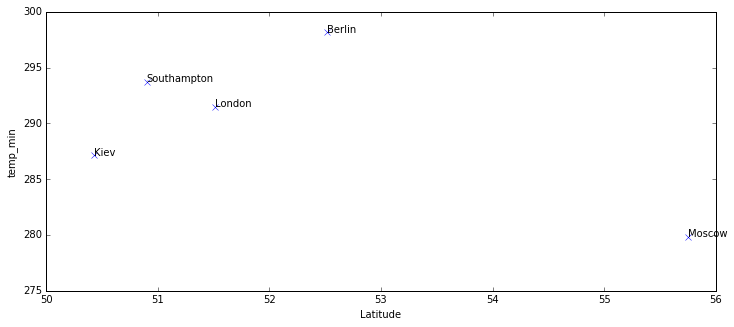

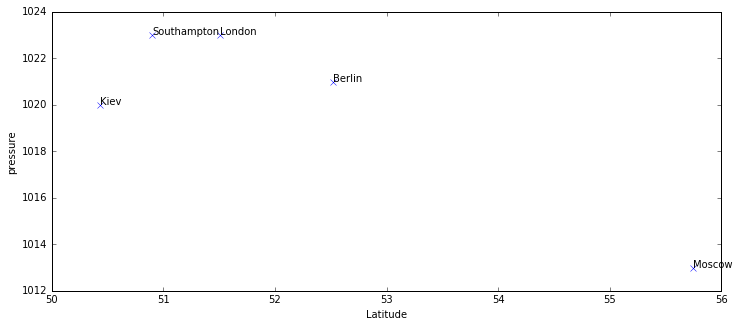

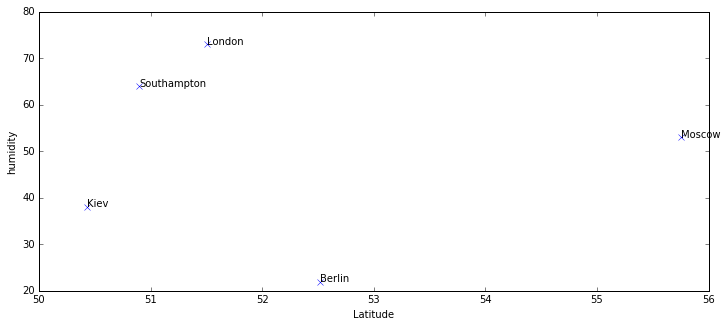

In [10]:
# Here are the variables that should be in your data
weather_vars = ['temp', 'temp_max', 'temp_min', 'pressure', 'humidity']

# EXERCISE: Loop over the variable strings above and plot them 
for var_name in weather_vars:
    plot_weather_lattitude(weather_dict, var_name)